# Pruebas de carga de imagenes de 16 bits

In [15]:
import os
# import gdal
from osgeo import gdal


path_16bit_images = "/home/pablo.canosa/wip/datasets/small_gaofen/train/16bit_images"

# Get each image in the directory
for image in os.listdir(path_16bit_images):
    full_path = os.path.join(path_16bit_images, image)
    # Open the image with gdal
    ds = gdal.Open(full_path)
    # Get the number of bands
    bands = ds.RasterCount
    # Get the image size
    cols = ds.RasterXSize
    rows = ds.RasterYSize
    # Get the image projection
    projection = ds.GetProjection()
    # Get the image geotransform
    geotransform = ds.GetGeoTransform()
    # Get the image driver
    driver = ds.GetDriver().LongName
    # Get the image datatype
    datatype = ds.GetRasterBand(1).DataType
    # Print the image metadata
    print("Image: ", image)
    print("Bands: ", bands)
    print("Size: ", cols, rows)
    print("Projection: ", projection)
    print("Geotransform: ", geotransform)
    print("Driver: ", driver)
    print("Datatype: ", datatype)
    print("")


    # move the data to a numpy array
    data = ds.ReadAsArray()


    #reshape the data so (x,y,4)
    data = data.transpose(2,1,0)

    print(data.shape)
    print(data.dtype)
    print(data.min())
    print(data.max())
    print(data.mean())

    # Close the image
    ds = None
    break


Image:  GF2_PMS1__L1A0000962382-MSS1_1.tiff
Bands:  4
Size:  3650 3454
Projection:  
Geotransform:  (0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Driver:  GeoTIFF
Datatype:  2

(3650, 3454, 4)
uint16
78
999
318.10562865369513


In [16]:
print(data.shape)

(3650, 3454, 4)


In [17]:
# print mean, min, max for each band
for i in range(data.shape[2]):
    print("Band: ", i)
    print("Mean: ", data[:,:,i].mean())
    print("Min: ", data[:,:,i].min())
    print("Max: ", data[:,:,i].max())
    print("")

Band:  0
Mean:  363.7189252088109
Min:  288
Max:  999

Band:  1
Mean:  270.60735014396647
Min:  163
Max:  999

Band:  2
Mean:  175.27810495673074
Min:  85
Max:  994

Band:  3
Mean:  462.81813430527245
Min:  78
Max:  960



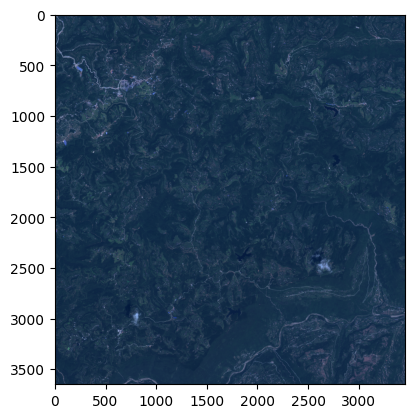

In [18]:
# Show the first 3 bands of the image with matplotlib

# the data format is BGRNir
# we will show the RGB bands
# show the image with opencv
import cv2
temp = data[:,:,::-1]
# normalize the data to 0-255
temp = (temp - temp.min()) / (temp.max() - temp.min()) * 255
temp = temp.astype("uint8")

# make resizable window
cv2.namedWindow("image", cv2.WINDOW_NORMAL)


cv2.imshow("image", temp[:,:,1:4])
cv2.waitKey(0)
cv2.destroyAllWindows()


import matplotlib.pyplot as plt
temp = data[:,:,::-1]
temp = (temp - temp.min()) / (temp.max() - temp.min()) * 255
temp = temp.astype("uint8")
plt.imshow(temp[:,:,1:4])
plt.show()


(3650, 3454, 4)


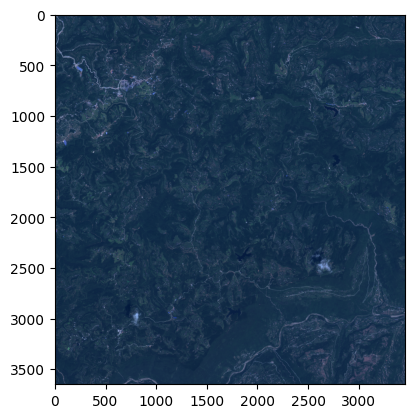

In [24]:

path_16bit_images = "/home/pablo.canosa/wip/datasets/small_gaofen/train/16bit_images"

# Get each image in the directory
for image in os.listdir(path_16bit_images):
    full_path = os.path.join(path_16bit_images, image)
    image_data = read_image_gdal_to_numpy(full_path)
    
    import matplotlib.pyplot as plt
    print(image_data.shape)
    temp = image_data[:,:,::-1]
    temp = (temp - temp.min()) / (temp.max() - temp.min()) * 255
    temp = temp.astype("uint8")
    plt.imshow(temp[:,:,1:4])
    plt.show()
    break

In [60]:
import numpy as np
from osgeo import gdal


def read_image_gdal_to_numpy(image_path):
    ds = gdal.Open(image_path)
    data = ds.ReadAsArray()
    data = data.transpose(2,1,0)
    ds = None
    return data[:,:,::-1]# return format is NIRRGB


def save_image(image, filename):
    image = image.transpose(1,0,2)
    print("image shape is ", image.shape)
    sizes = np.array([image.shape[0], image.shape[1], image.shape[2]])
    image_raw = np.concatenate([sizes, image.flatten()]).astype(np.int32)

    newFile = open(filename, "wb")
    image_raw.tofile(newFile, format="%d")
    newFile.close()

In [61]:
import os

images_train = "/home/pablo.canosa/wip/datasets/small_gaofen/train/16bit_images"
images_dest = "/home/pablo.canosa/wip/datasets/small_gaofen/train/16bit_rawb"
for image in os.listdir(images_train):
    image_path = os.path.join(images_train, image)
    image_data = read_image_gdal_to_numpy(image_path)
    
    image_name = image.split(".")[0]
    save_image(image_data, images_dest+"/"+image_name+".rawb")
    
    

image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image sh

In [62]:
import os

images_test = "/home/pablo.canosa/wip/datasets/small_gaofen/test/test_16bit_images"
images_dest = "/home/pablo.canosa/wip/datasets/small_gaofen/test/test_16bit_rawb"

for image in os.listdir(images_test):
    image_path = os.path.join(images_test, image)
    image_data = read_image_gdal_to_numpy(image_path)
    
    image_name = image.split(".")[0]
    save_image(image_data, images_dest+"/"+image_name+".rawb")

image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image shape is  (3454, 3650, 4)
image sh

In [14]:
# read a rawb image
import numpy as np


image_path = "/home/pablo.canosa/wip/datasets/small_gaofen/train/16bit_rawb/GF2_PMS1__L1A0000962382-MSS1_1.rawb"

def read_rawb_image(image_path):
    with open(image_path, "rb") as f:
        sizes = np.fromfile(f, dtype=np.int32, count=3)
        image_data = np.fromfile(f, dtype=np.int32)
        image = image_data.reshape(sizes)
    return image

image = read_rawb_image(image_path)
print(image.shape)
print(image.dtype)
print(image.min())
print(image.max())
print(image.mean())

# cast image to float32

image = image.astype(np.float32)
print(image.shape)
print(image.dtype)
print(image.min())
print(image.max())
print(image.mean())




(3454, 3650, 4)
int32
78
999
318.10562865369513
(3454, 3650, 4)
float32
78.0
999.0
318.1047


In [13]:
import os


def read_rawb_image(image_path):
    with open(image_path, "rb") as f:
        sizes = np.fromfile(f, dtype=np.int32, count=3)
        image_data = np.fromfile(f, dtype=np.int32)
        image = image_data.reshape(sizes)
    return image

folder = "/home/pablo.canosa/wip/datasets/small_gaofen/train/16bit_rawb/"

#for image in os.listdir(folder):
#    image_path = os.path.join(folder, image)
#    image_data = read_rawb_image(image_path)



    